# Библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Константы

In [2]:
data_path = 'data/'
pd.options.display.max_rows = 999
features = ['A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10',
            'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate']

# Загрузка данных

In [3]:
train_features = pd.read_csv(data_path + 'train_features.csv')
test_features = pd.read_csv(data_path + 'test_features.csv')
train_targets = pd.read_csv(data_path + 'train_targets.csv')

# EDA

In [4]:
train_features['timestamp'] = pd.to_datetime(train_features['timestamp'])
test_features['timestamp'] = pd.to_datetime(test_features['timestamp'])
train_targets['timestamp'] = pd.to_datetime(train_targets['timestamp'])

In [5]:
train_features.head()

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409
3,2020-01-01 01:30:00,69.994748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.839126
4,2020-01-01 02:00:00,70.072762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.336921


In [6]:
train_features = train_features.sort_values('timestamp').reset_index(drop = True)

In [7]:
train_features.isnull().sum()

timestamp      0
A_rate         1
A_CH4        959
A_C2H6       959
A_C3H8       959
A_iC4H10     959
A_nC4H10     959
A_iC5H12     959
A_nC5H12     959
A_C6H14      959
B_rate       133
dtype: int64

In [8]:
train_features.isnull().sum(axis = 1)

0       8
1       8
2       8
3       8
4       8
       ..
5803    0
5804    0
5805    0
5806    0
5807    0
Length: 5808, dtype: int64

In [9]:
train_features['nans'] = train_features.isnull().sum(axis = 1).values

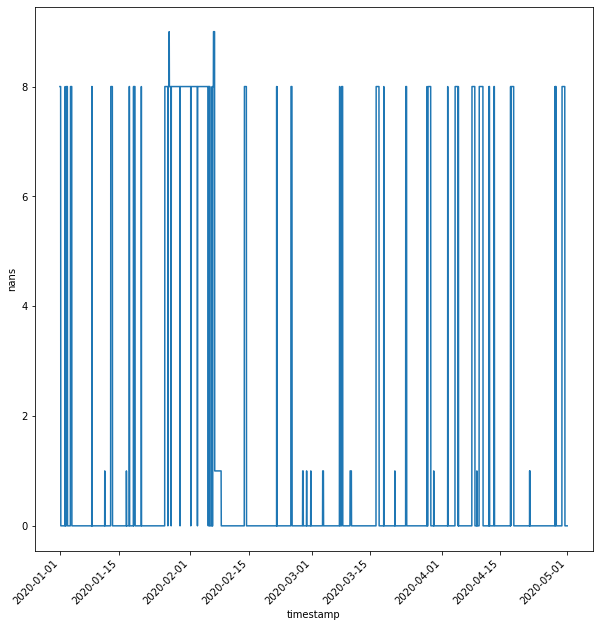

In [10]:
_ = plt.figure(figsize = (10, 10))
_ = sns.lineplot(x = 'timestamp', y= 'nans', data = train_features)
_ = plt.xticks(rotation=45, ha='right')

In [11]:
train_features['nans'].max()

9

In [12]:
train_features.head(500)

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,nans
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789,8
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098,8
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409,8
3,2020-01-01 01:30:00,69.994748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.839126,8
4,2020-01-01 02:00:00,70.072762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.336921,8
5,2020-01-01 02:30:00,69.998381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.317841,8
6,2020-01-01 03:00:00,69.929341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.160398,8
7,2020-01-01 03:30:00,70.286208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.111527,8
8,2020-01-01 04:00:00,70.521133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.217070,8
9,2020-01-01 04:30:00,71.055792,0.126244,5.242957,41.941480,17.064213,23.205953,4.184848,4.062079,4.110170,71.389674,0


In [13]:
train_features[train_features['nans'] != 0].head(50)

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,nans
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789,8
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098,8
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409,8
3,2020-01-01 01:30:00,69.994748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.839126,8
4,2020-01-01 02:00:00,70.072762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.336921,8
5,2020-01-01 02:30:00,69.998381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.317841,8
6,2020-01-01 03:00:00,69.929341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.160398,8
7,2020-01-01 03:30:00,70.286208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.111527,8
8,2020-01-01 04:00:00,70.521133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.217070,8
60,2020-01-02 06:00:00,72.673690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.949862,8


In [14]:
print(train_features['timestamp'].min())
print(train_features['timestamp'].max())

2020-01-01 00:00:00
2020-04-30 23:30:00


In [15]:
pd.to_datetime('2020-02-01 23:30:00')

Timestamp('2020-02-01 23:30:00')

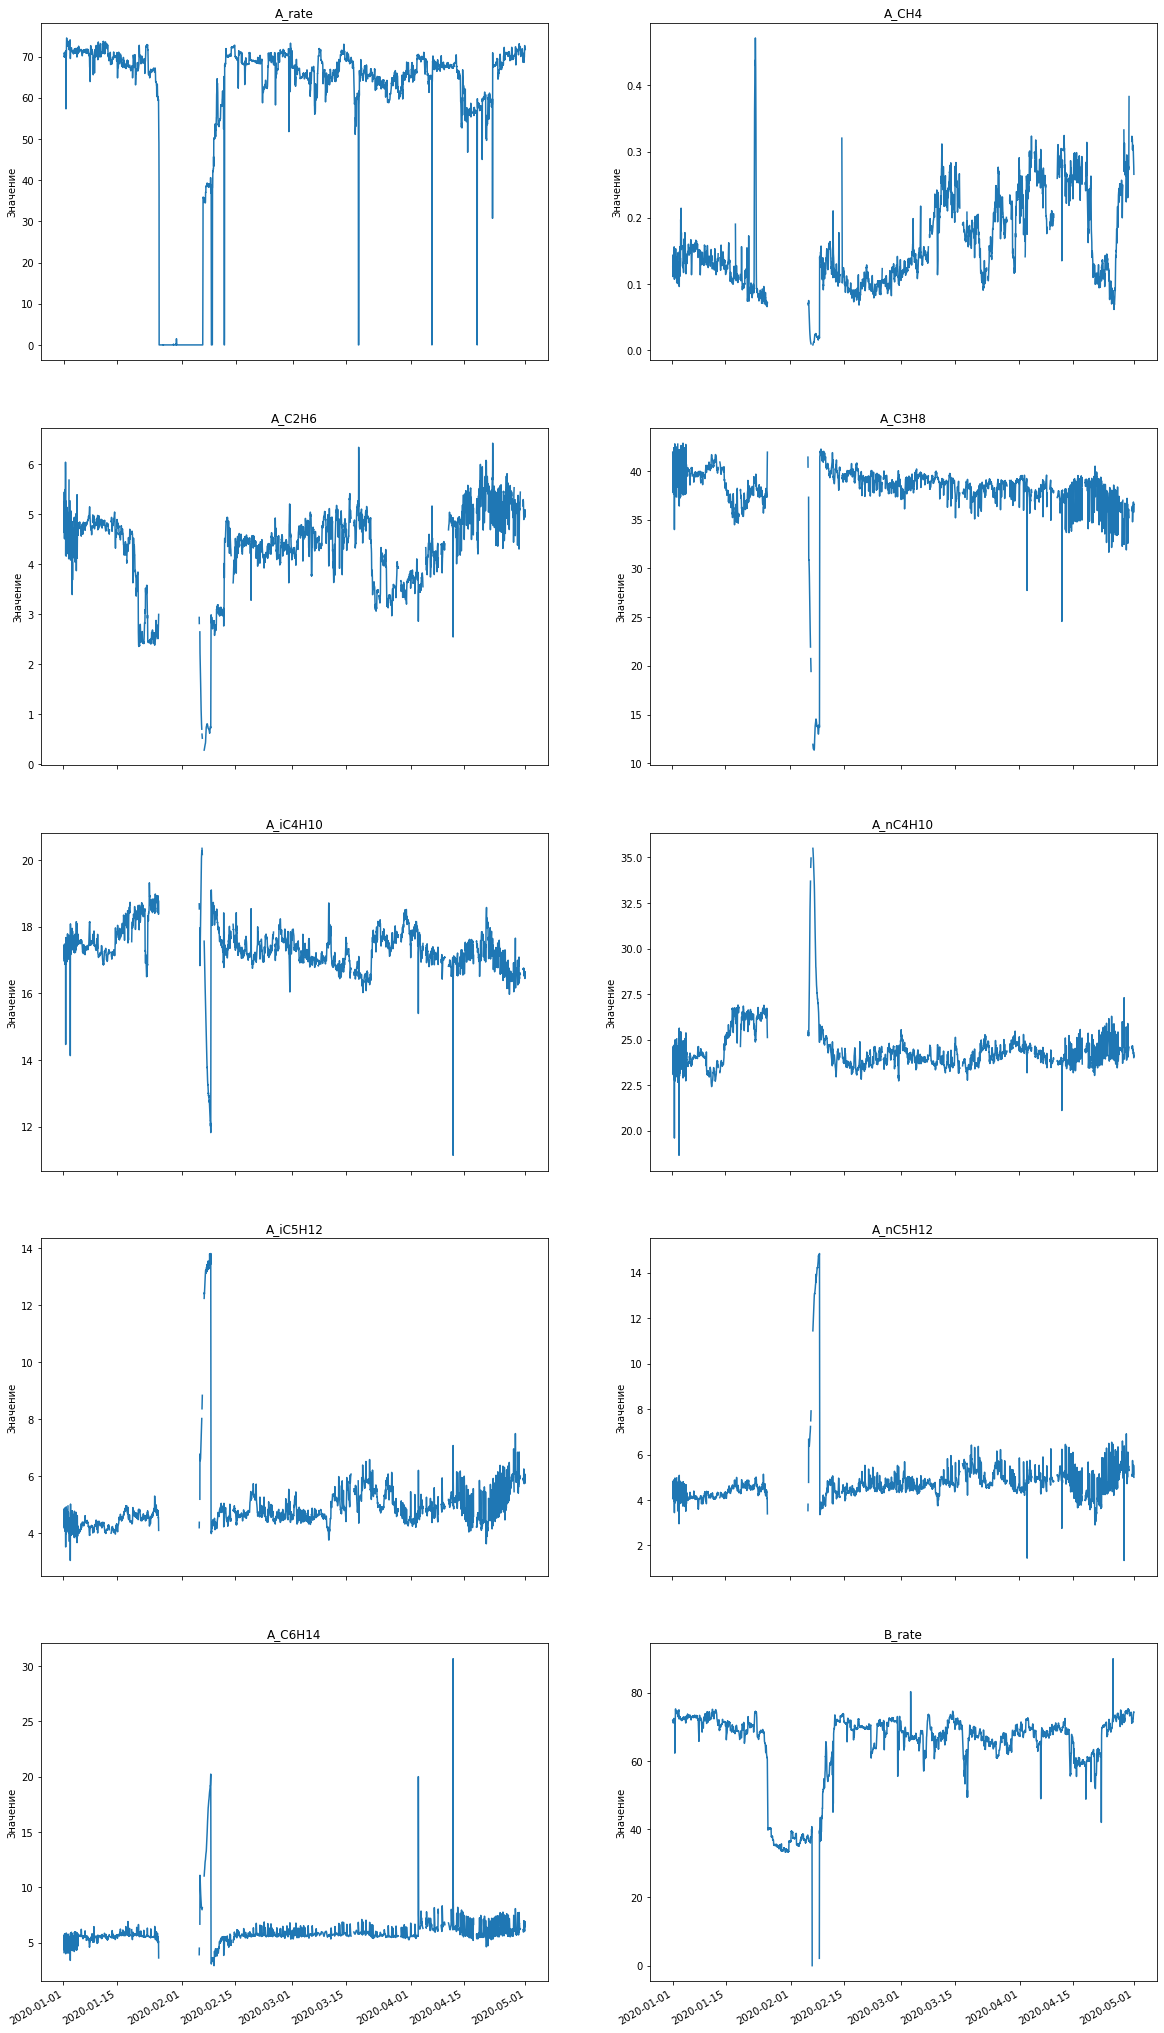

In [16]:
fig, ax = plt.subplots(5, 2, figsize = (20, 40))
fig.autofmt_xdate()
row = 0
col = 0
for feature in features:
    _ = sns.lineplot(x = 'timestamp', 
                     y = feature,
                     data = train_features,
                     ax = ax[row][col])
    ax[row][col].set_xlabel('')
    ax[row][col].set_ylabel('Значение')
    ax[row][col].set_title(feature)
    if col == 1:
        row = row+1
        col = 0
    else:
        col = col+1

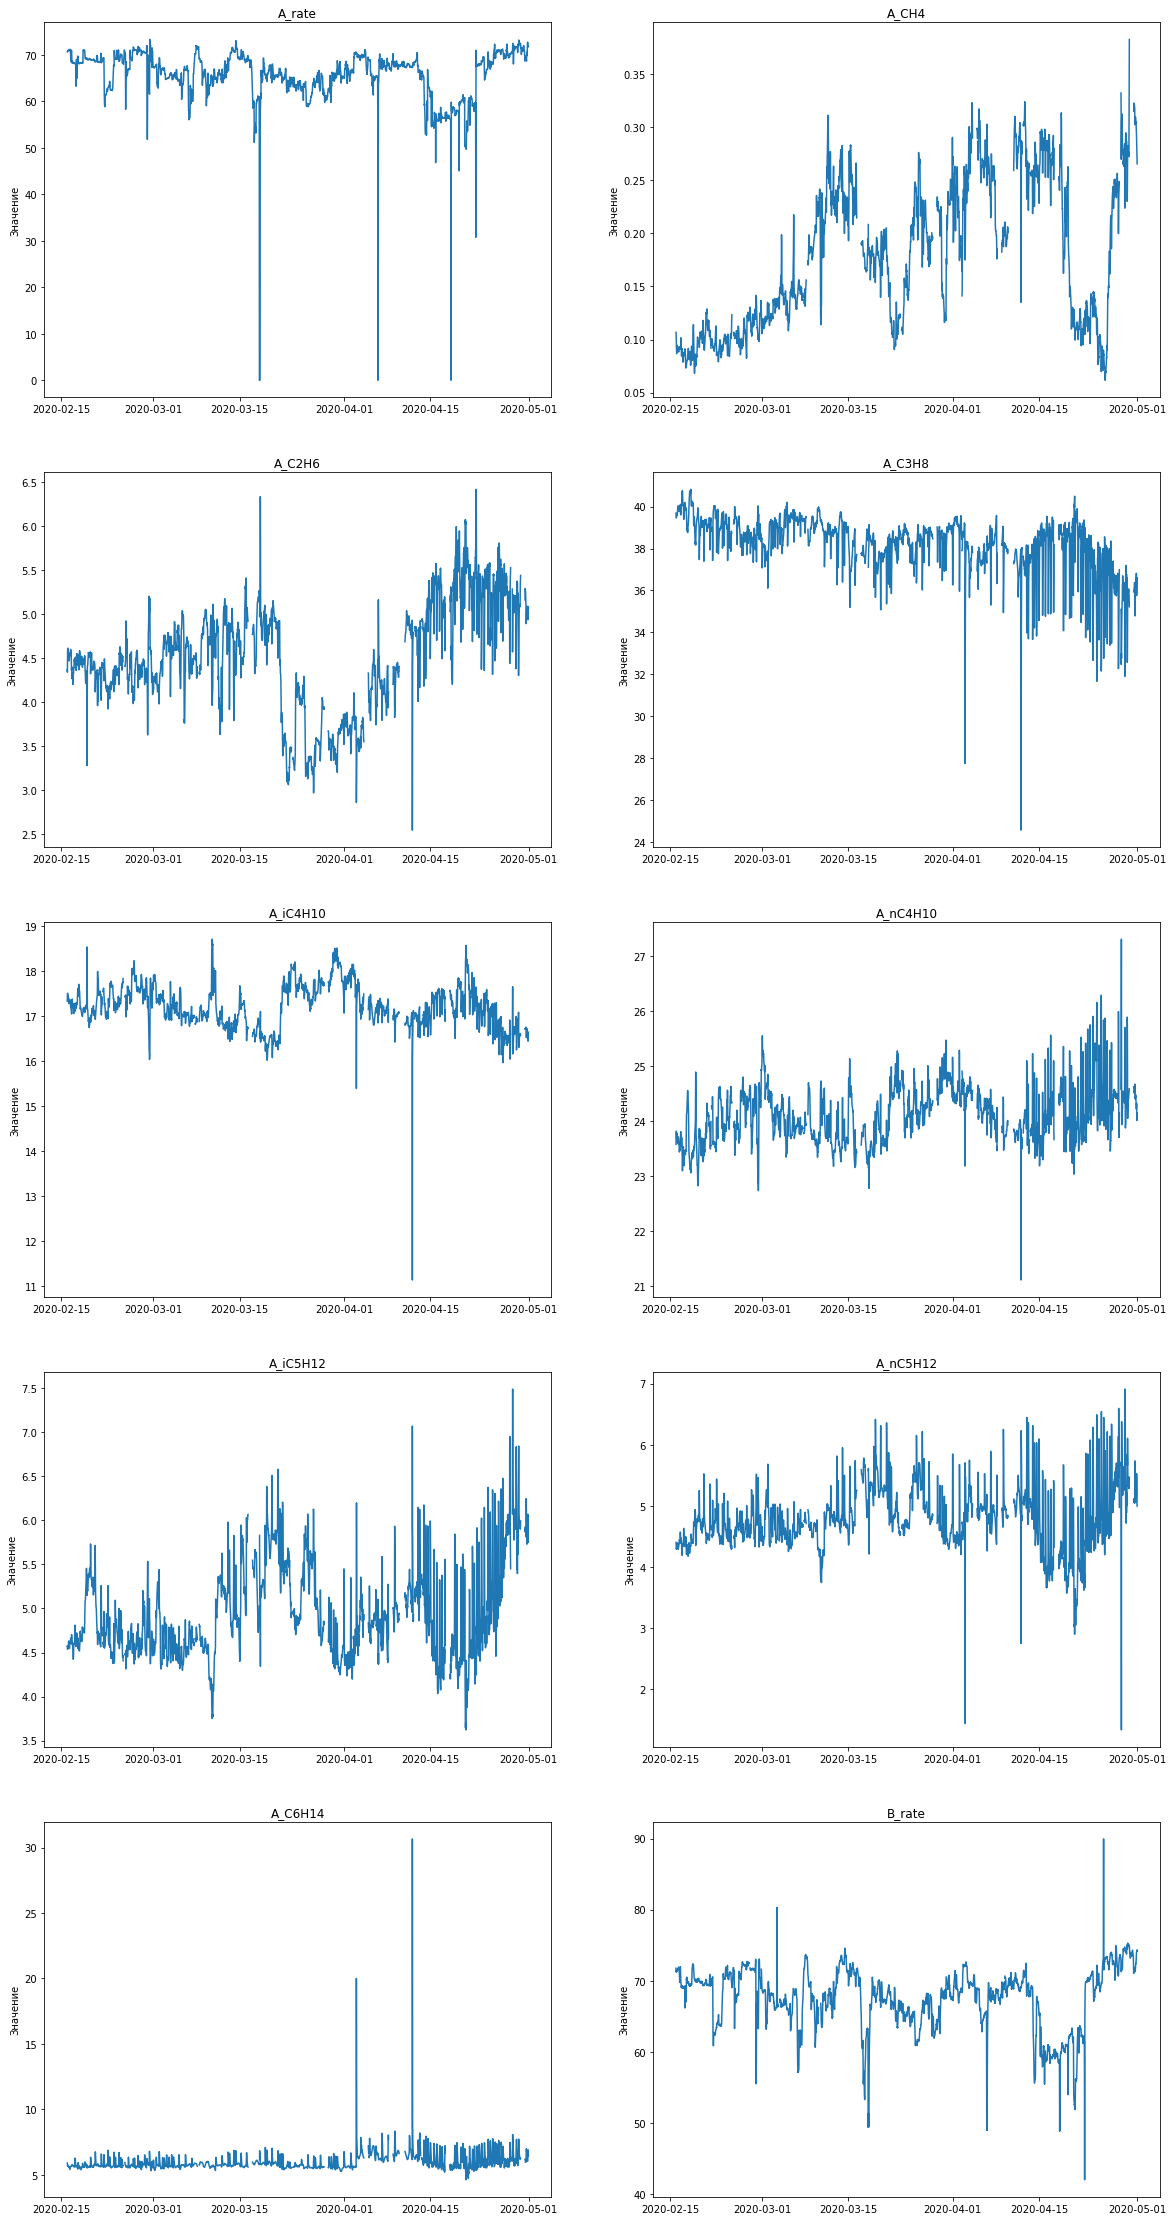

In [17]:
fig, ax = plt.subplots(5, 2, figsize = (20, 40))
row = 0
col = 0
for feature in features:
    _ = sns.lineplot(x = 'timestamp', 
                     y = feature,
                     data = train_features[train_features['timestamp']>= pd.to_datetime('2020-02-15 23:30:00')],
                     ax = ax[row][col])
    ax[row][col].set_xlabel('')
    ax[row][col].set_ylabel('Значение')
    ax[row][col].set_title(feature)
    if col == 1:
        row = row+1
        col = 0
    else:
        col = col+1

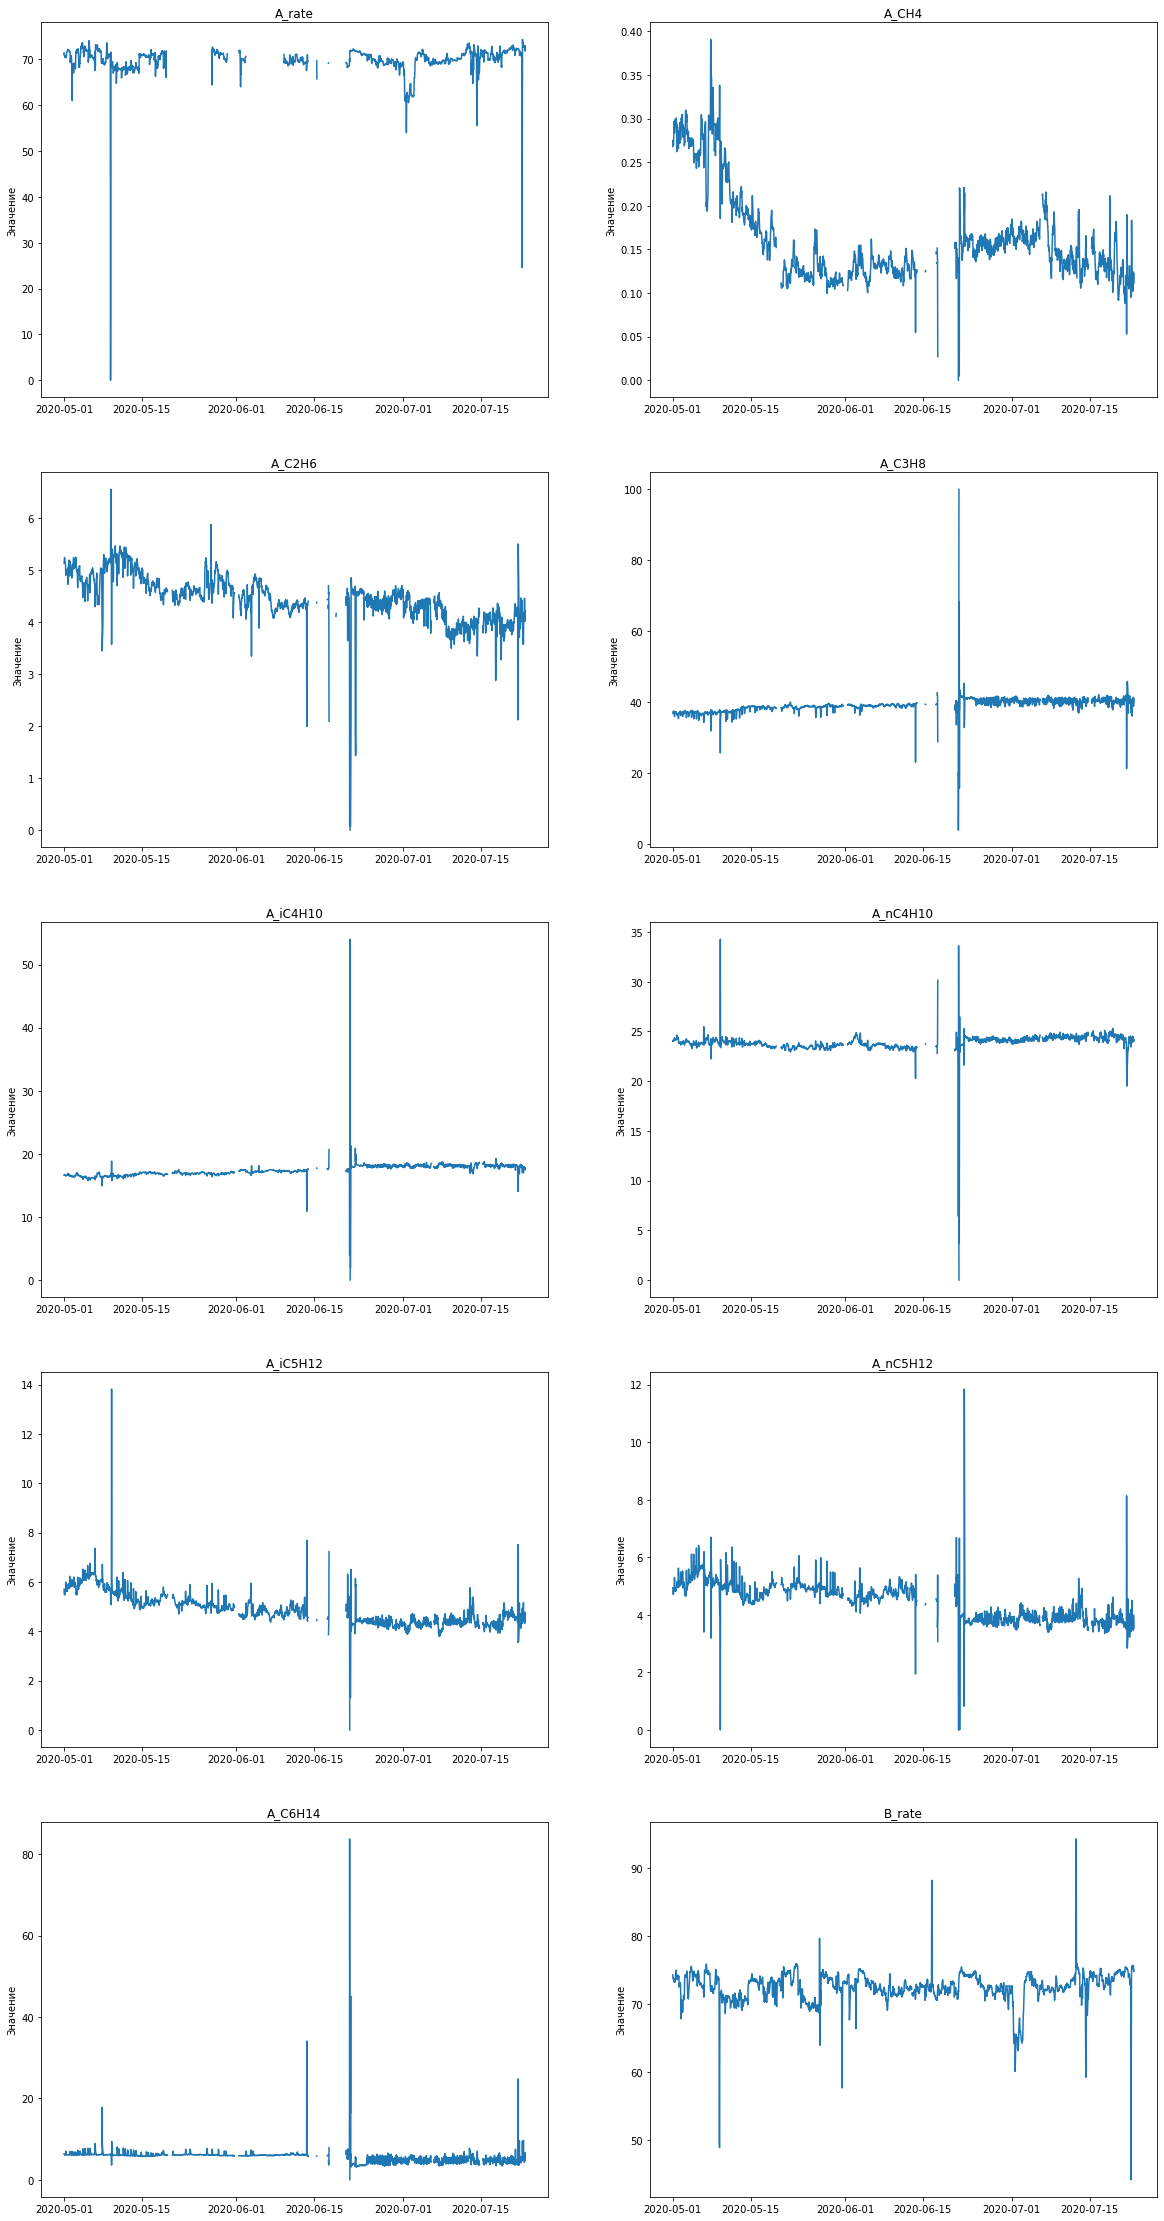

In [18]:
fig, ax = plt.subplots(5, 2, figsize = (20, 40))
row = 0
col = 0
for feature in features:
    _ = sns.lineplot(x = 'timestamp', 
                     y = feature,
                     data = test_features,
                     ax = ax[row][col])
    ax[row][col].set_xlabel('')
    ax[row][col].set_ylabel('Значение')
    ax[row][col].set_title(feature)
    if col == 1:
        row = row+1
        col = 0
    else:
        col = col+1

In [19]:
train_targets.head()

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-01-01 00:00:00,4.561979,39.015486,17.250740,24.301793
1,2020-01-01 00:30:00,4.550741,39.048915,17.229506,24.257461
2,2020-01-01 01:00:00,4.506793,38.766378,17.171621,24.236298
3,2020-01-01 01:30:00,4.584963,39.069360,17.218521,24.149843
4,2020-01-01 02:00:00,4.607483,38.817579,17.108668,24.049510


In [20]:
train_targets.isnull().sum()

timestamp      0
B_C2H6       184
B_C3H8       180
B_iC4H10     180
B_nC4H10     180
dtype: int64

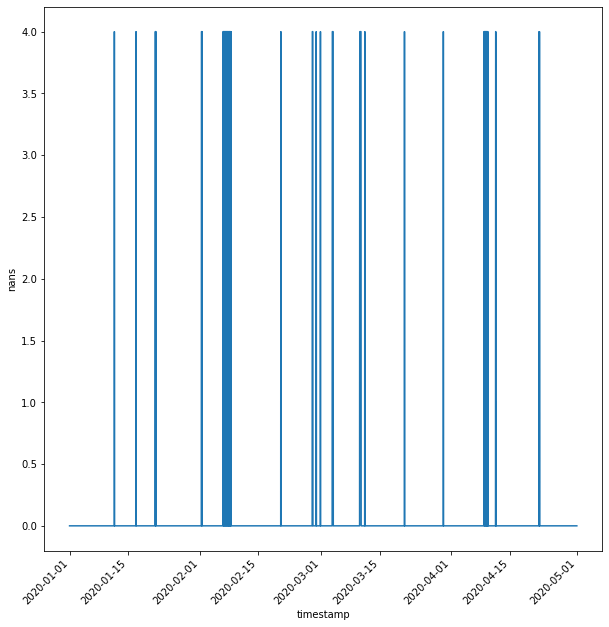

In [21]:
train_targets['nans'] = train_targets.isnull().sum(axis = 1).values
_ = plt.figure(figsize = (10, 10))
_ = sns.lineplot(x = 'timestamp', y= 'nans', data = train_targets)
_ = plt.xticks(rotation=45, ha='right')

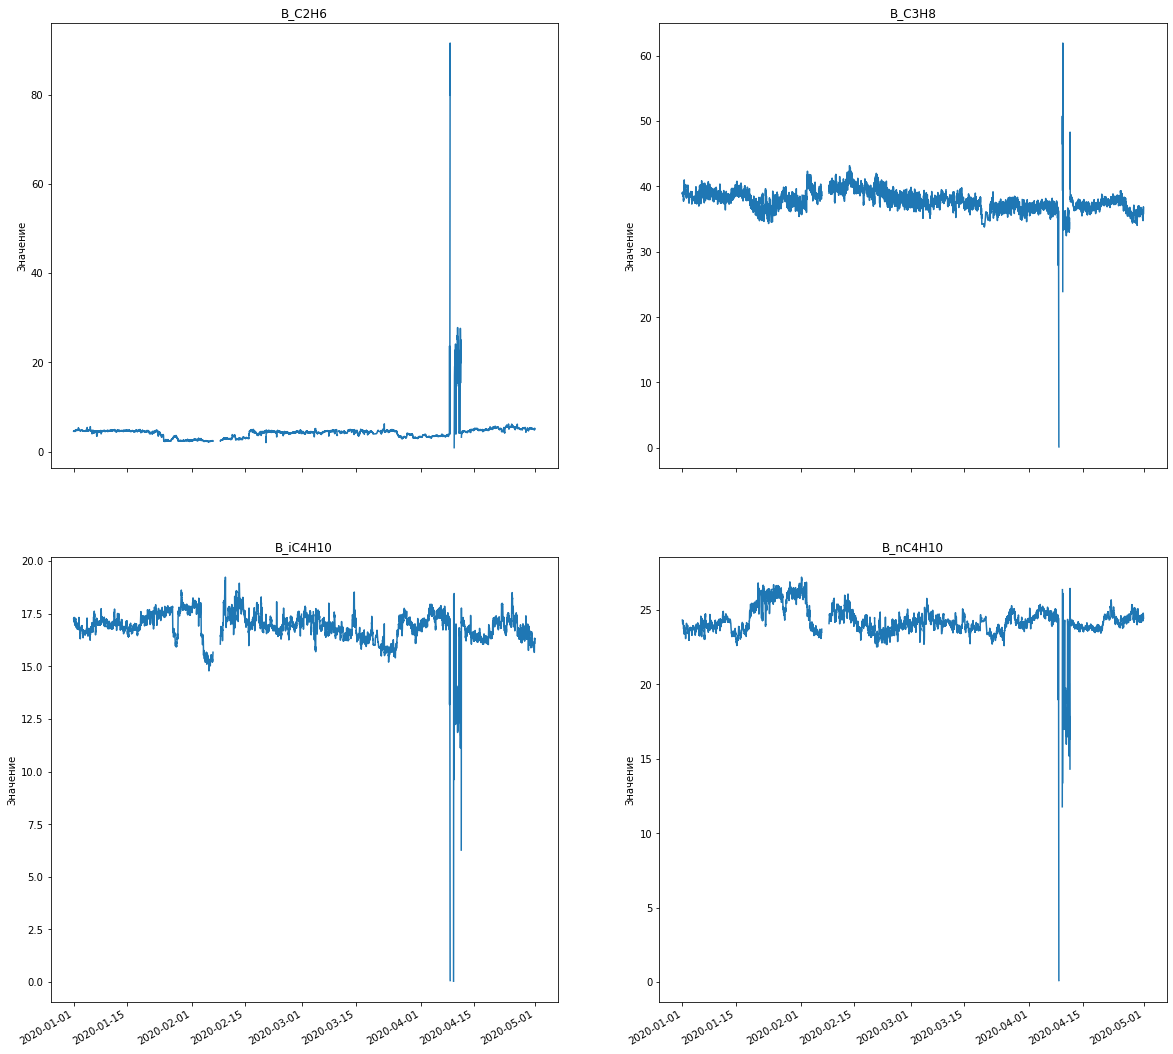

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20))
row = 0
col = 0
fig.autofmt_xdate()
for feature in train_targets.columns[1:-1]:
    _ = sns.lineplot(x = 'timestamp', 
                     y = feature,
                     data = train_targets,
                     ax = ax[row][col])
    ax[row][col].set_xlabel('')
    ax[row][col].set_ylabel('Значение')
    ax[row][col].set_title(feature)
    if col == 1:
        row = row+1
        col = 0
    else:
        col = col+1

In [23]:
# Предыдущий день исходя из календаря.
train_features['date_previous_real'] = train_features['timestamp'] - pd.Timedelta('30 minutes')
# Предыдущий день, исходя из наблюдений
train_features['date_previous_fact'] = train_features['timestamp'].shift(1)

train_features_dates = train_features.dropna(subset = ['date_previous_fact'])[['timestamp',
                                                                               'date_previous_fact',
                                                                               'date_previous_real']]

train_features_dates[train_features_dates['date_previous_fact'] != train_features_dates['date_previous_real']]

,timestamp,date_previous_fact,date_previous_real


In [24]:
# Предыдущий день исходя из календаря.
test_features['date_previous_real'] = test_features['timestamp'] - pd.Timedelta('30 minutes')
# Предыдущий день, исходя из наблюдений
test_features['date_previous_fact'] = test_features['timestamp'].shift(1)

train_features_dates = test_features.dropna(subset = ['date_previous_fact'])[['timestamp',
                                                                              'date_previous_fact',
                                                                              'date_previous_real']]

train_features_dates[train_features_dates['date_previous_fact'] != train_features_dates['date_previous_real']]

,timestamp,date_previous_fact,date_previous_real


In [25]:
# Предыдущий день исходя из календаря.
train_targets['date_previous_real'] = train_targets['timestamp'] - pd.Timedelta('30 minutes')
# Предыдущий день, исходя из наблюдений
train_targets['date_previous_fact'] = train_targets['timestamp'].shift(1)

train_features_dates = train_targets.dropna(subset = ['date_previous_fact'])[['timestamp',
                                                                              'date_previous_fact',
                                                                              'date_previous_real']]

train_features_dates[train_features_dates['date_previous_fact'] != train_features_dates['date_previous_real']]

,timestamp,date_previous_fact,date_previous_real
